In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

In [19]:
'''
hrnetv2_c1_df = pd.read_csv('../tmp_results/sp200_hrnetv2.csv')
mb2d_c1dp_df = pd.read_csv('../tmp_results/sp200_mobilenetv2dilated-c1_deepsup.csv')
res101_ppmdp_df = pd.read_csv('../tmp_results/sp200_resnet101dilated-ppm_deepsup.csv')
res101_up_df = pd.read_csv('../tmp_results/sp200_resnet101-upernet.csv')
res18_ppmdp_df = pd.read_csv('../tmp_results/sp200_resnet18dilated-ppm_deepsup.csv')
res50_ppmdp_df = pd.read_csv('../tmp_results/sp200_resnet50dilated-ppm_deepsup.csv')
res50_up_df = pd.read_csv('../tmp_results/sp200_resnet50-upernet.csv')
'''
hrnetv2_c1_df = pd.read_csv('../tmp_results/sp150_hrnetv2.csv')
mb2d_c1dp_df = pd.read_csv('../tmp_results/sp150_mobilenetv2dilated-c1_deepsup.csv')
res101_ppmdp_df = pd.read_csv('../tmp_results/sp150_resnet101dilated-ppm_deepsup.csv')
res101_up_df = pd.read_csv('../tmp_results/sp150_resnet101-upernet.csv')
res18_ppmdp_df = pd.read_csv('../tmp_results/sp150_resnet18dilated-ppm_deepsup.csv')
res50_ppmdp_df = pd.read_csv('../tmp_results/sp150_resnet50dilated-ppm_deepsup.csv')
res50_up_df = pd.read_csv('../tmp_results/sp150_resnet50-upernet.csv')

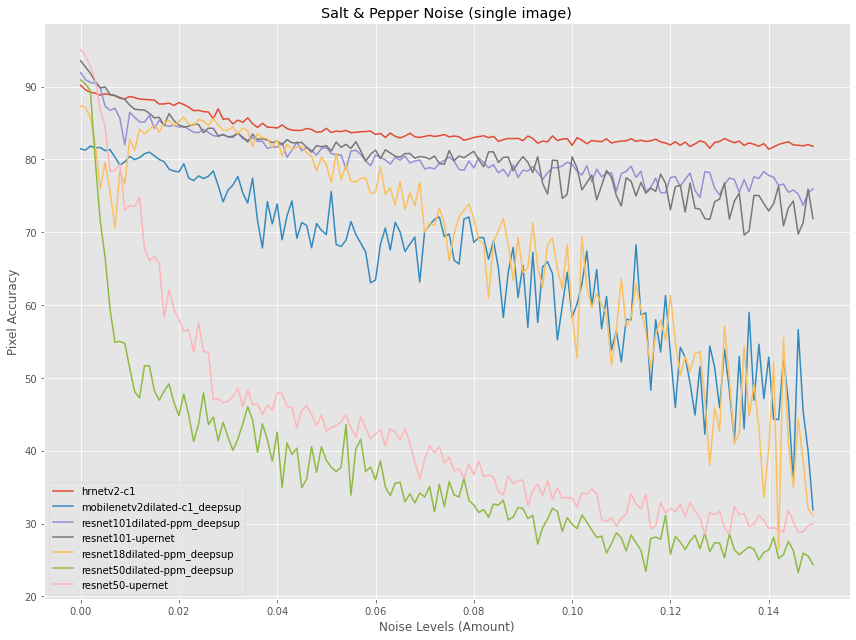

In [20]:
plt.figure(figsize=(12, 9))

plt.plot(hrnetv2_c1_df['amount'].values, hrnetv2_c1_df['PixelAcc'].values, label="hrnetv2-c1")
plt.plot(mb2d_c1dp_df['amount'].values, mb2d_c1dp_df['PixelAcc'].values, label="mobilenetv2dilated-c1_deepsup")
plt.plot(res101_ppmdp_df['amount'].values, res101_ppmdp_df['PixelAcc'].values, label="resnet101dilated-ppm_deepsup")
plt.plot(res101_up_df['amount'].values, res101_up_df['PixelAcc'].values, label="resnet101-upernet")
plt.plot(res18_ppmdp_df['amount'].values, res18_ppmdp_df['PixelAcc'].values, label="resnet18dilated-ppm_deepsup")
plt.plot(res50_ppmdp_df['amount'].values, res50_ppmdp_df['PixelAcc'].values, label="resnet50dilated-ppm_deepsup")
plt.plot(res50_up_df['amount'].values, res50_up_df['PixelAcc'].values, label="resnet50-upernet")


plt.xlabel('Noise Levels (Amount)')
plt.ylabel('Pixel Accuracy')
plt.title('Salt & Pepper Noise (single image)')
plt.tight_layout()
plt.legend()
# plt.savefig("../tmp_results/sp200.png")
plt.savefig("../tmp_results/sp150.png")
plt.show()